## Global Earthquake Analysis and Prediction

In [170]:
import sys
!{sys.executable} -m pip install geopandas -q



In [171]:
# import all important libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
import geopandas as gpd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from shapely.geometry import Point 
import warnings
warnings.filterwarnings('ignore')
plt.style.use("dark_background")

In [172]:
# import dataset
df=pd.read_csv("C:\\Users\\HP\\OneDrive\\Desktop\\ML Datasets\\earthquake_data_tsunami.csv")

In [173]:
df.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1


In [174]:
df.shape

(782, 13)

In [175]:
df.describe()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,6.941125,4.333760,5.964194,870.108696,230.250639,1.325757,25.038990,75.883199,3.538100,52.609199,2012.280051,6.563939,0.388747
std,0.445514,3.169939,1.462724,322.465367,250.188177,2.218805,24.225067,137.277078,27.303429,117.898886,6.099439,3.507866,0.487778
min,6.500000,0.000000,1.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000,2001.000000,1.000000,0.000000
25%,6.600000,0.000000,5.000000,691.000000,0.000000,0.000000,14.625000,14.000000,-14.595600,-71.668050,2007.000000,3.250000,0.000000
50%,6.800000,5.000000,6.000000,754.000000,140.000000,0.000000,20.000000,26.295000,-2.572500,109.426000,2013.000000,7.000000,0.000000
75%,7.100000,7.000000,7.000000,909.750000,445.000000,1.863000,30.000000,49.750000,24.654500,148.941000,2017.000000,10.000000,1.000000
max,9.100000,9.000000,9.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000,2022.000000,12.000000,1.000000


In [176]:
#checking duplicate values
df.duplicated().sum()

np.int64(0)

In [177]:
# checking null values
df.isnull().sum()

magnitude    0
cdi          0
mmi          0
sig          0
nst          0
dmin         0
gap          0
depth        0
latitude     0
longitude    0
Year         0
Month        0
tsunami      0
dtype: int64

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  782 non-null    float64
 1   cdi        782 non-null    int64  
 2   mmi        782 non-null    int64  
 3   sig        782 non-null    int64  
 4   nst        782 non-null    int64  
 5   dmin       782 non-null    float64
 6   gap        782 non-null    float64
 7   depth      782 non-null    float64
 8   latitude   782 non-null    float64
 9   longitude  782 non-null    float64
 10  Year       782 non-null    int64  
 11  Month      782 non-null    int64  
 12  tsunami    782 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 79.6 KB


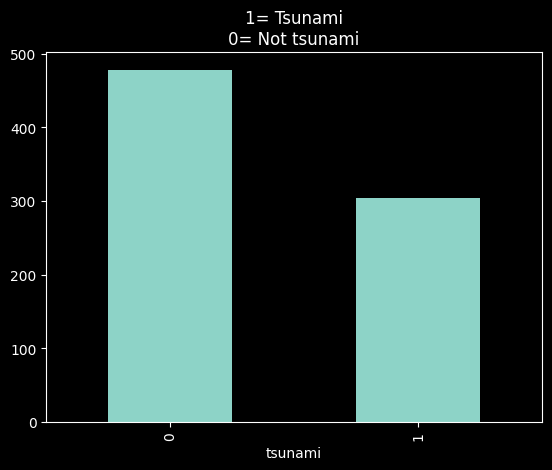

In [179]:
df.tsunami.value_counts().plot(kind="bar",title="1= Tsunami\n0= Not tsunami")
plt.show()

In [180]:
df[df.magnitude >=8.0].shape

(28, 13)

Major earthquake events took 28 times


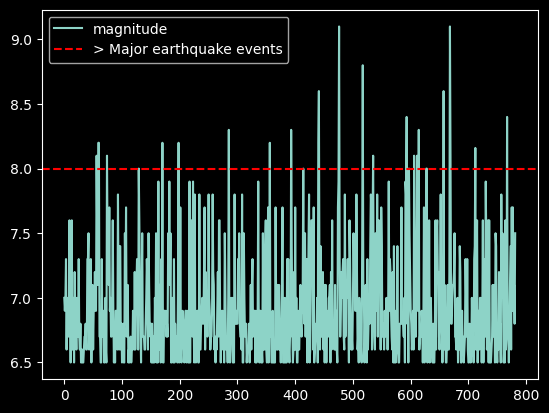

In [181]:
print("Major earthquake events took",df[df.magnitude >=8.0].shape[0],"times")
df.magnitude.plot()
plt.axhline(y=8.0,
            color="red",
           label="> Major earthquake events",
           linestyle="--")
plt.legend()
plt.show()

## Checking in which year and months the major earthquake(28 times) took place

In [182]:
df.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1


In [183]:
df_mazor_earthquake=df[df.magnitude >=8.0]

In [184]:
gdf_mgreater_8 = gpd.GeoDataFrame(
    df_mazor_earthquake,
    geometry=gpd.points_from_xy(df_mazor_earthquake['longitude'], df_mazor_earthquake['latitude']),
    crs="EPSG:4326"
)
gdf_mgreater_8.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami,geometry
56,8.1,0,7,1009,0,7.463,78.0,22.79,-58.4157,-25.3206,2021,8,0,POINT (-25.3206 -58.4157)
59,8.2,8,6,1237,0,0.875,66.0,46.66,55.4742,-157.9170,2021,7,1,POINT (-157.917 55.4742)
60,8.2,8,7,1252,0,0.000,0.0,35.00,55.3154,-157.8290,2021,7,1,POINT (-157.829 55.3154)
74,8.1,9,8,1021,0,0.739,21.0,28.93,-29.7466,-177.2240,2021,3,1,POINT (-177.224 -29.7466)
129,8.0,9,8,1890,0,3.180,17.0,122.57,-5.8119,-75.2697,2019,5,1,POINT (-75.2697 -5.8119)


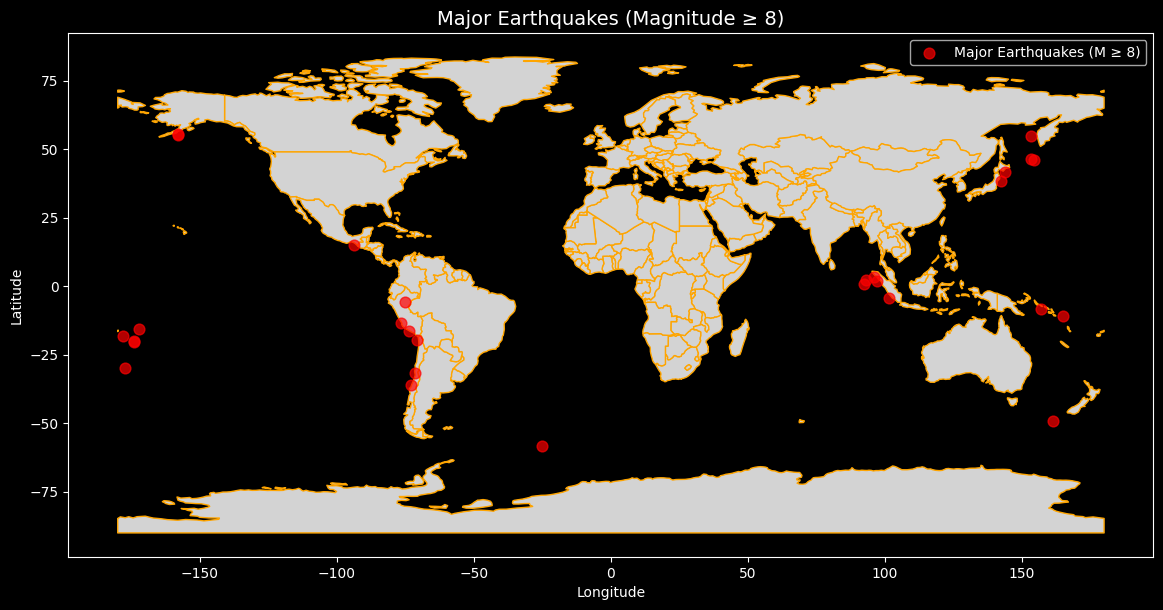

In [185]:
url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)
fig, ax = plt.subplots(figsize=(14, 8))

world.plot(ax=ax, color="lightgray", edgecolor="orange")
gdf_mgreater_8.plot(
    ax=ax,
    color="red",
    markersize=60,
    alpha=0.7,
    label="Major Earthquakes (M ≥ 8)"
)

ax.set_title("Major Earthquakes (Magnitude ≥ 8)", fontsize=14)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend()

plt.show()

## Now checking area where acctually tsunami occur with manitude > 8¶

In [186]:
act_tsu_mag_g8=df.loc[(df.magnitude >=8.0)& (df.tsunami == 1),["longitude","latitude"]]
print(f"Actual tsunami with magnitude greater than 8 occurs in {act_tsu_mag_g8.shape[0]} areas")

Actual tsunami with magnitude greater than 8 occurs in 10 areas


In [187]:
act_gdf_mgreater_8 = gpd.GeoDataFrame(
    act_tsu_mag_g8,
    geometry=gpd.points_from_xy(act_tsu_mag_g8['longitude'], act_tsu_mag_g8['latitude']),
    crs="EPSG:4326"
)
act_gdf_mgreater_8.head()

,longitude,latitude,geometry
59,-157.9170,55.4742,POINT (-157.917 55.4742)
60,-157.8290,55.3154,POINT (-157.829 55.3154)
74,-177.2240,-29.7466,POINT (-177.224 -29.7466)
129,-75.2697,-5.8119,POINT (-75.2697 -5.8119)
170,-178.1530,-18.1125,POINT (-178.153 -18.1125)


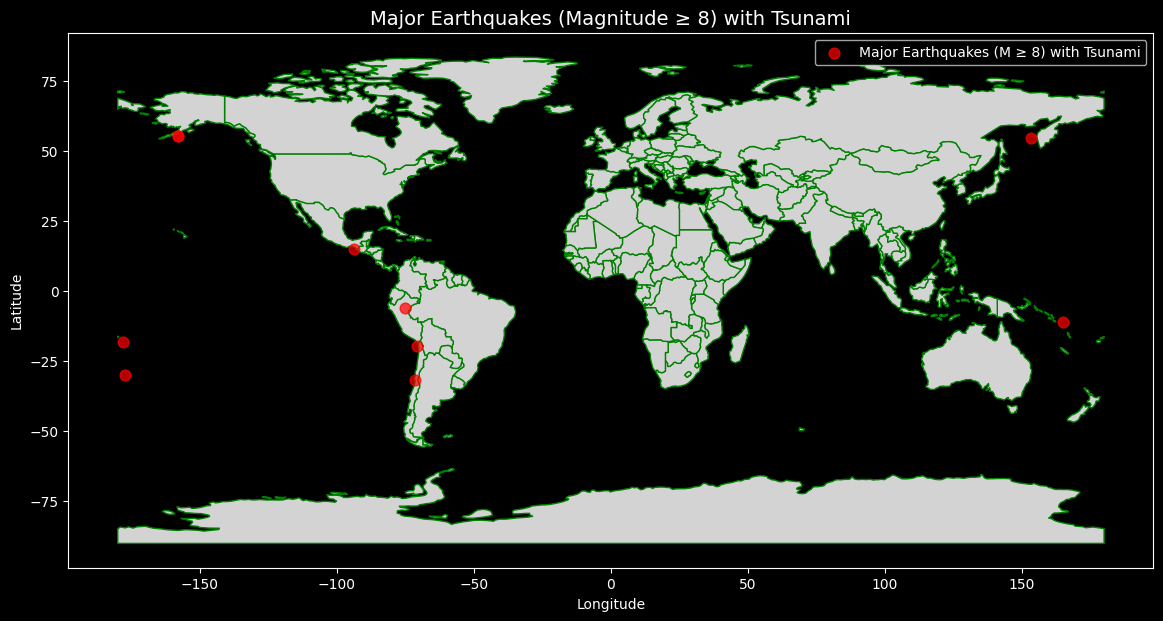

In [188]:
world2 = gpd.read_file(url)
fig, ax2 = plt.subplots(figsize=(14, 8))

world2.plot(ax=ax2, color="lightgray", edgecolor="green")
act_gdf_mgreater_8.plot(
    ax=ax2,
    color="red",
    markersize=60,
    alpha=0.7,
    label="Major Earthquakes (M ≥ 8) with Tsunami"
)

ax2.set_title("Major Earthquakes (Magnitude ≥ 8) with Tsunami", fontsize=14)
ax2.set_xlabel("Longitude")
ax2.set_ylabel("Latitude")
ax2.legend()

plt.show()

## Areas where tsunami occured

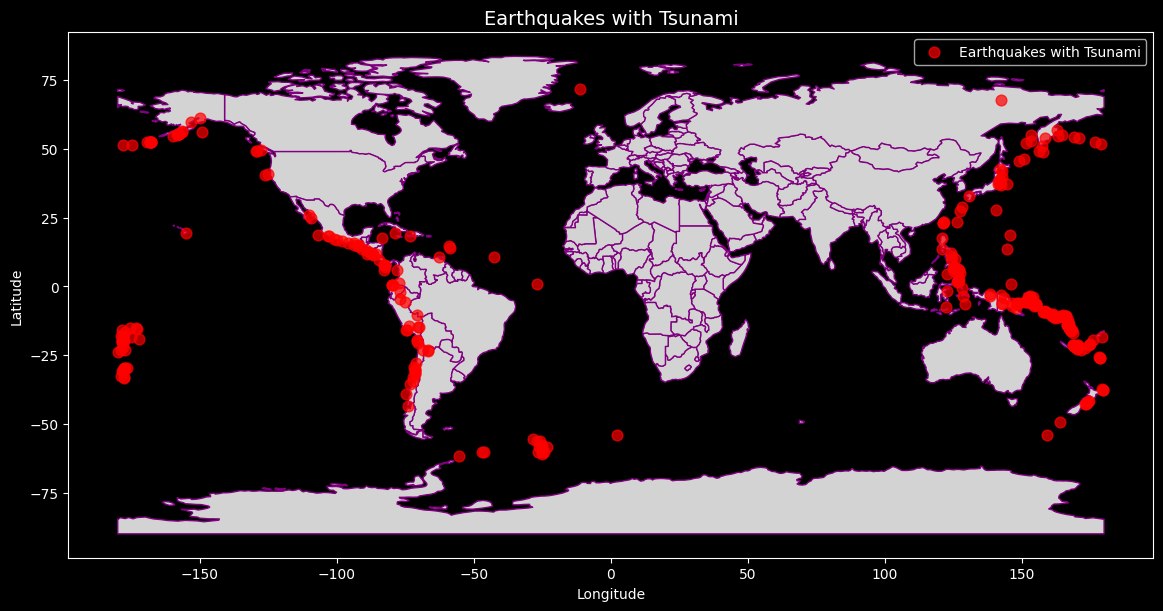

In [189]:
tsunami_oocur=df[df.tsunami==1]
tsunami_h=gpd.GeoDataFrame(
    tsunami_oocur,
    geometry =gpd.points_from_xy(tsunami_oocur["longitude"],
                                tsunami_oocur["latitude"]),
    crs="EPSG:4326"
)
world3 = gpd.read_file(url)
fig, ax3 = plt.subplots(figsize=(14, 8))

world3.plot(ax=ax3, color="lightgray", edgecolor="purple")
tsunami_h.plot(
    ax=ax3,
    color="red",
    markersize=60,
    alpha=0.7,
    label="Earthquakes with Tsunami"
)

ax3.set_title("Earthquakes with Tsunami", fontsize=14)
ax3.set_xlabel("Longitude")
ax3.set_ylabel("Latitude")
ax3.legend()
plt.show()

In [190]:
df.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1


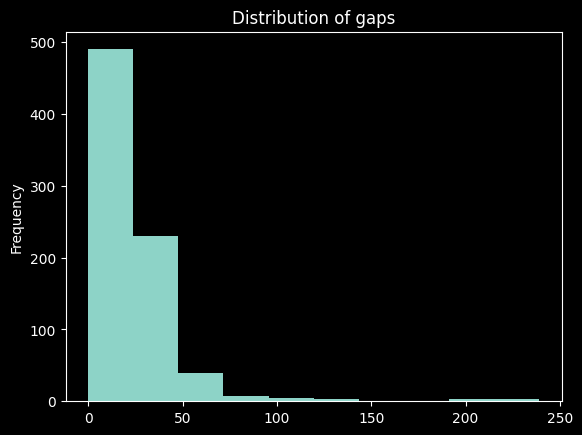

In [191]:
df.gap.plot(kind="hist",
               title="Distribution of gaps")
plt.show()

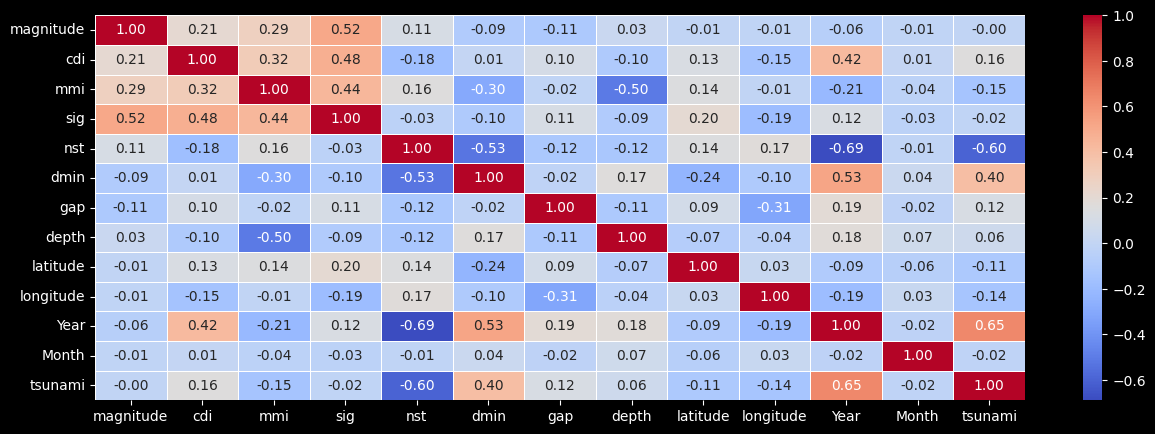

In [192]:
plt.figure(figsize=(15,5))
sns.heatmap(
    df.corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.show()

## Outlier detection

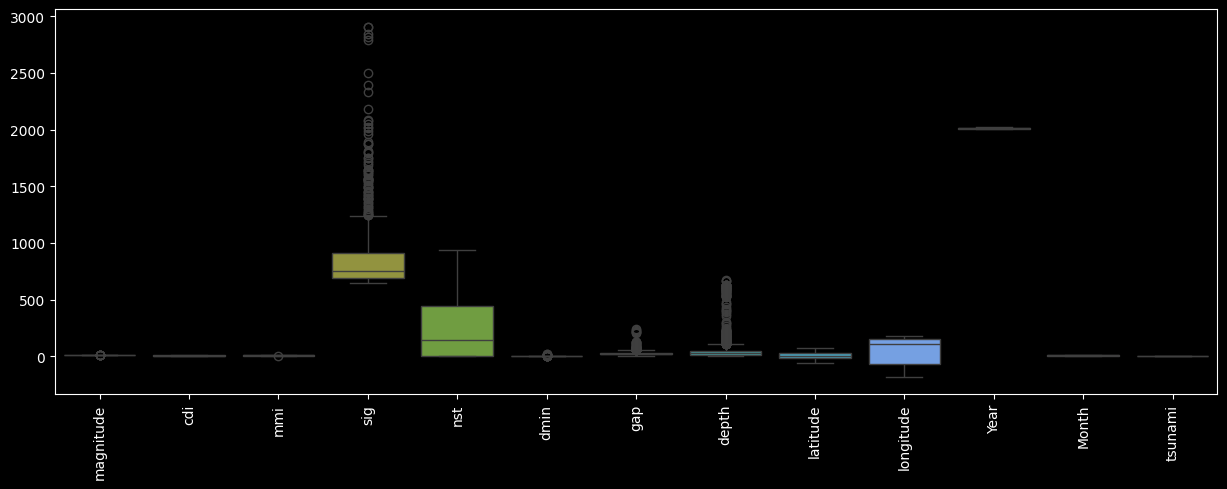

In [193]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

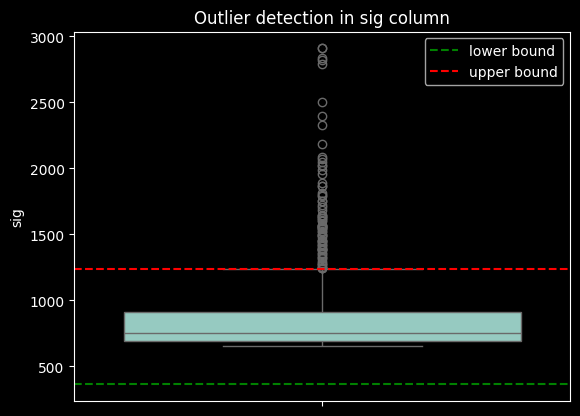

In [194]:
q1=df.sig.quantile(0.25)
q3=df.sig.quantile(0.75)
iqr=q3-q1
lower=q1 - 1.5*iqr
upper = q3 + 1.5 * iqr
sns.boxplot(df.sig)
plt.axhline(y=lower,
            color="green",
           label="lower bound",
           linestyle="--")
plt.axhline(y=upper,
            color="red",
           label="upper bound",
           linestyle="--")
plt.legend()
plt.title("Outlier detection in sig column")
plt.show()

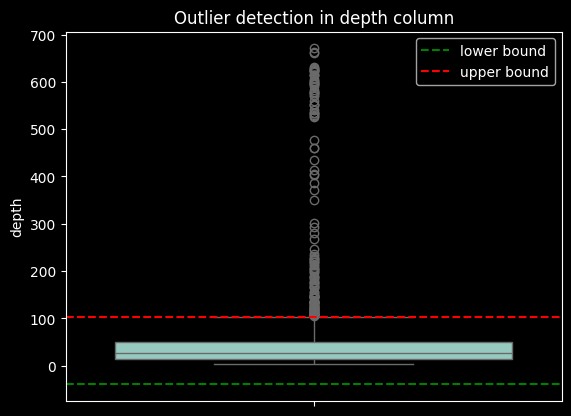

In [195]:
q1=df.depth.quantile(0.25)
q3=df.depth.quantile(0.75)
iqr=q3-q1
lower=q1 - 1.5*iqr
upper = q3 + 1.5 * iqr
sns.boxplot(df.depth)
plt.axhline(y=lower,
            color="green",
           label="lower bound",
           linestyle="--")
plt.axhline(y=upper,
            color="red",
           label="upper bound",
           linestyle="--")
plt.legend()
plt.title("Outlier detection in depth column")
plt.show()


In [196]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_clean = df[
    ~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)
]

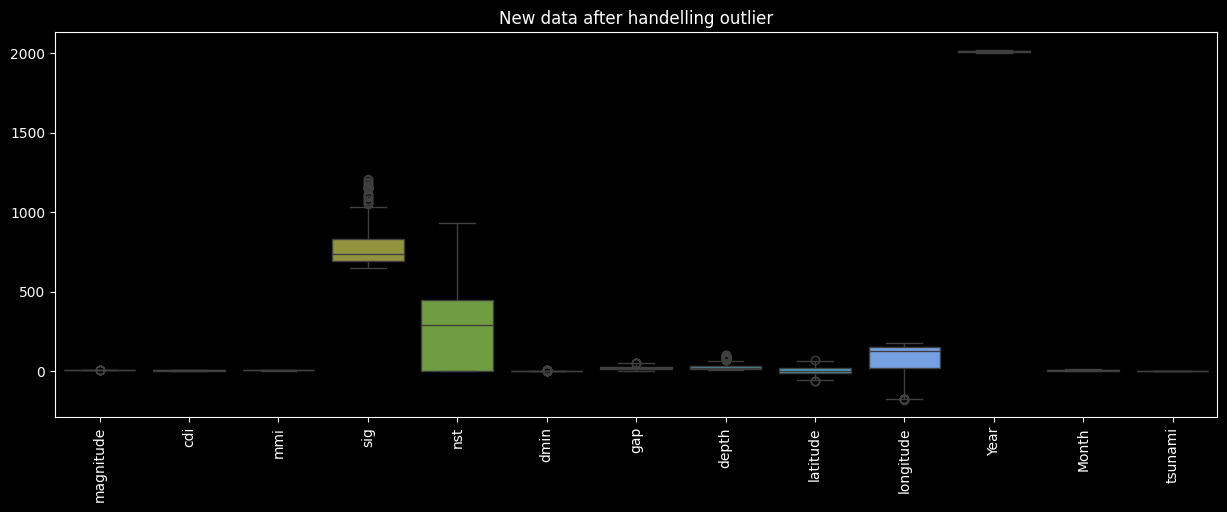

In [197]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df_clean)
plt.xticks(rotation=90)
plt.title('New data after handelling outlier')
plt.show()

## Model training

In [198]:
X=np.array(df_clean.drop(columns=["tsunami"]))
y=np.array(df_clean.tsunami)

In [199]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

print("X_train shape",X_train.shape)
print("X_test shape",X_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

X_train shape (382, 12)
X_test shape (96, 12)
y_train shape (382,)
y_test shape (96,)


In [200]:
# scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

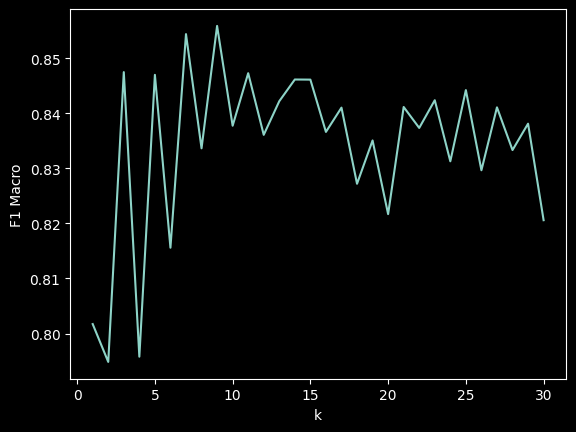

In [201]:
k_values = range(1, 31)
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=5, scoring="f1_macro").mean()
    scores.append(score)

plt.plot(k_values, scores)
plt.xlabel("k")
plt.ylabel("F1 Macro")
plt.show()

## Train model from KNeighborsClassifier¶

In [202]:
knnc =KNeighborsClassifier(n_neighbors=7, weights="distance")
knnc.fit(X_train,y_train)
print("Train score :",knnc.score(X_train,y_train))
print("Test score :",knnc.score(X_test,y_test))
print("Classification report:\n")
print(classification_report(y_test,knnc.predict(X_test)))



Train score : 1.0
Test score : 0.8958333333333334
Classification report:

              precision    recall  f1-score   support

           0       0.94      0.91      0.92        64
           1       0.82      0.88      0.85        32

    accuracy                           0.90        96
   macro avg       0.88      0.89      0.88        96
weighted avg       0.90      0.90      0.90        96



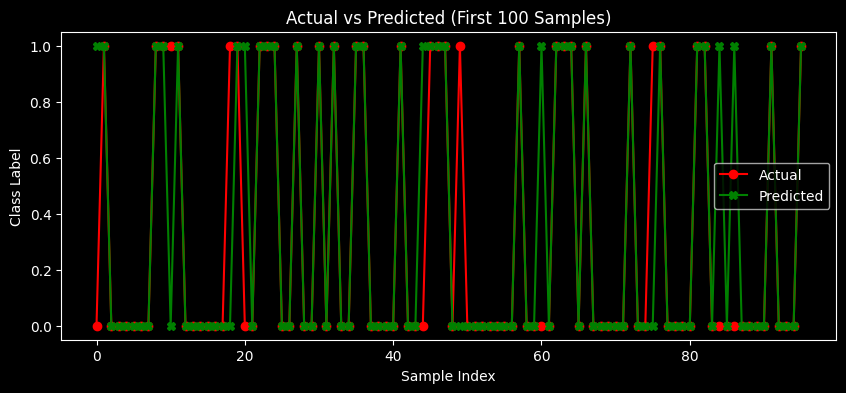

In [204]:
y_pred=knnc.predict(X_test)
plt.figure(figsize=(10, 4))
plt.plot(y_test[:100], label="Actual", marker='o',c="red")
plt.plot(y_pred[:100], label="Predicted", marker='X',c="green")

plt.legend()
plt.xlabel("Sample Index")
plt.ylabel("Class Label")
plt.title("Actual vs Predicted (First 100 Samples)")
plt.show()

## Cross validation for KNN¶

In [205]:
scores=cross_val_score(knnc,
               X_train,
               y_train,
               cv=10)
print("Cross validation :",scores)

print("Average accuracy :",scores.mean())

Cross validation : [0.84615385 0.92307692 0.94736842 0.86842105 0.84210526 0.84210526
 0.89473684 0.92105263 0.78947368 0.76315789]
Average accuracy : 0.8637651821862349


## Training model from Random Forest¶

In [206]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(
    n_estimators=400,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight="balanced",
    random_state=42
)
rf.fit(X_train,y_train)
print("Train score :",rf.score(X_train,y_train))
print("Test score :",rf.score(X_test,y_test))
print("Classification report:\n")
print(classification_report(y_test,rf.predict(X_test)))


Train score : 0.9738219895287958
Test score : 0.9479166666666666
Classification report:

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        64
           1       0.86      1.00      0.93        32

    accuracy                           0.95        96
   macro avg       0.93      0.96      0.94        96
weighted avg       0.95      0.95      0.95        96



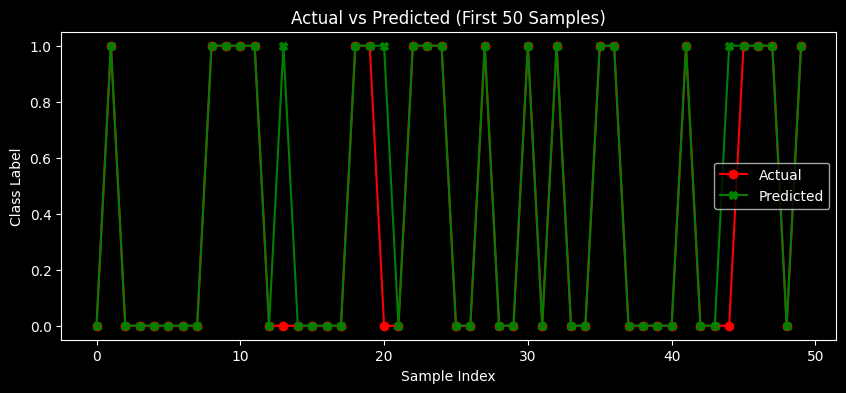

In [207]:
y_pred=rf.predict(X_test)
plt.figure(figsize=(10, 4))
plt.plot(y_test[:50], label="Actual", marker='o',c="red")
plt.plot(y_pred[:50], label="Predicted", marker='X',c="green")

plt.legend()
plt.xlabel("Sample Index")
plt.ylabel("Class Label")
plt.title("Actual vs Predicted (First 50 Samples)")
plt.show()


## Cross validation for Random forest

In [208]:
scores=cross_val_score(rf,
               X_train,
               y_train,
               cv=10)
print("Cross validation :",scores)
print("Average accuracy :",scores.mean())

Cross validation : [0.92307692 0.92307692 0.97368421 0.94736842 0.92105263 0.86842105
 1.         0.94736842 0.89473684 0.89473684]
Average accuracy : 0.9293522267206479
